<a href="https://colab.research.google.com/github/SeoMinJong/deep_learning/blob/main/beef_pork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import tensorflow as tf

In [2]:
df = pd.read_csv('C:/study_data/OneDrive-2021-07-18/Meat_dataset.csv')
df = df.iloc[:,1:8]

In [3]:
# df.drop(['income'],axis=1)

In [4]:
beef_df = df['beef'] == 1
beef_df = df[beef_df]

pork_df = df['pork'] == 1
pork_df = df[pork_df]

In [5]:
display(beef_df)
display(pork_df)

,price,meat_weight,delivery charge,meat_weight_100g,income,beef,pork
60,157380,12.0,0.0,13115,0,1,0
61,27400,2.0,0.0,13700,0,1,0
62,26900,3.0,3.5,8967,0,1,0
63,36900,2.0,0.0,18450,0,1,0
64,46000,2.0,0.0,23000,0,1,0
65,38000,2.0,0.0,19000,0,1,0
66,71700,6.0,0.0,11950,0,1,0
67,26900,2.0,0.0,13450,0,1,0
68,89100,10.0,0.0,8910,0,1,0
69,214000,15.0,0.0,14267,0,1,0


,price,meat_weight,delivery charge,meat_weight_100g,income,beef,pork
0,11800,6.0,3.0,1967,0,0,1
1,6800,3.0,0.0,2267,0,0,1
2,32100,10.0,0.0,3210,0,0,1
3,26000,10.0,3.0,2600,0,0,1
4,4500,4.0,2.5,1125,0,0,1
5,19900,10.0,0.0,1990,0,0,1
6,13160,5.0,0.0,2632,0,0,1
7,14900,6.0,0.0,2483,0,0,1
8,17800,5.0,3.0,3560,0,0,1
9,16840,6.0,0.0,2807,0,0,1


AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755)


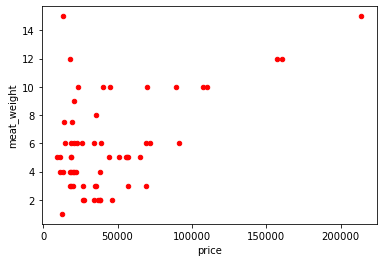

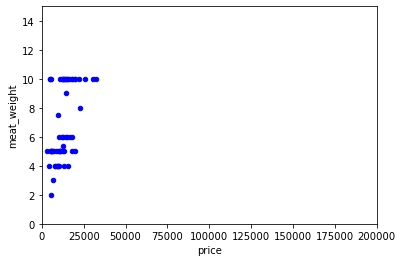

In [6]:
ax1 = beef_df.plot(kind='scatter', x='price', y='meat_weight', color='red')
ax2 = pork_df.plot(kind='scatter', x='price', y='meat_weight', color='blue')
plt.ylim(0,15)
plt.xlim(0,200000)

print(ax1 ,ax2)

In [7]:
input_cnt = 4
output_cnt = 2
train_raito = 0.8
mb_size = 12

In [8]:
MiniBath_step_count = int((df.shape[0] * train_raito) // mb_size)
MiniBath_step_count # 8개의 MiniBatch가 생길 수 있다.

8

In [9]:
test_start = MiniBath_step_count*mb_size
test_start

96

In [10]:
df = np.asarray(df, dtype='float32')
shuffle_map = np.arange(df.shape[0])
np.random.shuffle(shuffle_map)
df = df[shuffle_map]

In [11]:
train_df = df[:test_start]
test_df = df[test_start:]
display(train_df)
display(test_df)

array([[1.5738e+05, 1.2000e+01, 0.0000e+00, 1.3115e+04, 0.0000e+00,
        1.0000e+00, 0.0000e+00],
       [8.1900e+03, 5.0000e+00, 3.0000e+00, 1.6380e+03, 0.0000e+00,
        0.0000e+00, 1.0000e+00],
       [2.6900e+04, 2.0000e+00, 0.0000e+00, 1.3450e+04, 0.0000e+00,
        1.0000e+00, 0.0000e+00],
       [1.0650e+04, 5.0000e+00, 0.0000e+00, 2.1300e+03, 0.0000e+00,
        0.0000e+00, 1.0000e+00],
       [1.4540e+04, 6.0000e+00, 0.0000e+00, 2.4230e+03, 0.0000e+00,
        0.0000e+00, 1.0000e+00],
       [1.2930e+04, 1.0000e+00, 0.0000e+00, 1.2930e+04, 0.0000e+00,
        1.0000e+00, 0.0000e+00],
       [6.5000e+04, 5.0000e+00, 0.0000e+00, 1.3000e+04, 0.0000e+00,
        1.0000e+00, 0.0000e+00],
       [2.7400e+04, 2.0000e+00, 0.0000e+00, 1.3700e+04, 0.0000e+00,
        1.0000e+00, 0.0000e+00],
       [1.9900e+04, 1.0000e+01, 0.0000e+00, 1.9900e+03, 0.0000e+00,
        0.0000e+00, 1.0000e+00],
       [1.4900e+04, 6.0000e+00, 0.0000e+00, 2.4830e+03, 1.0000e+00,
        1.0000e+00, 0.0

array([[1.9900e+04, 3.0000e+00, 0.0000e+00, 6.6330e+03, 1.0000e+00,
        1.0000e+00, 0.0000e+00],
       [1.7900e+04, 4.0000e+00, 0.0000e+00, 4.4750e+03, 1.0000e+00,
        1.0000e+00, 0.0000e+00],
       [1.3080e+04, 4.0000e+00, 0.0000e+00, 3.2700e+03, 1.0000e+00,
        1.0000e+00, 0.0000e+00],
       [5.5400e+04, 5.0000e+00, 0.0000e+00, 1.1080e+04, 0.0000e+00,
        1.0000e+00, 0.0000e+00],
       [2.2900e+04, 8.0000e+00, 0.0000e+00, 2.8630e+03, 0.0000e+00,
        0.0000e+00, 1.0000e+00],
       [1.0400e+04, 6.0000e+00, 0.0000e+00, 1.7330e+03, 1.0000e+00,
        0.0000e+00, 1.0000e+00],
       [2.1900e+04, 1.0000e+01, 0.0000e+00, 2.1900e+03, 0.0000e+00,
        0.0000e+00, 1.0000e+00],
       [3.6900e+04, 2.0000e+00, 0.0000e+00, 1.8450e+04, 0.0000e+00,
        1.0000e+00, 0.0000e+00],
       [1.1010e+05, 1.0000e+01, 0.0000e+00, 1.1010e+04, 0.0000e+00,
        1.0000e+00, 0.0000e+00],
       [5.6200e+03, 1.0000e+01, 3.0000e+00, 5.6200e+02, 1.0000e+00,
        0.0000e+00, 1.0

In [12]:
train_X, train_y = train_df[:, :input_cnt], train_df[:, -output_cnt:]
test_X, test_y = test_df[:, :input_cnt], test_df[:, -output_cnt:]

In [13]:
display(train_X)
display(train_y)
display(test_X)
display(test_y)

array([[1.5738e+05, 1.2000e+01, 0.0000e+00, 1.3115e+04],
       [8.1900e+03, 5.0000e+00, 3.0000e+00, 1.6380e+03],
       [2.6900e+04, 2.0000e+00, 0.0000e+00, 1.3450e+04],
       [1.0650e+04, 5.0000e+00, 0.0000e+00, 2.1300e+03],
       [1.4540e+04, 6.0000e+00, 0.0000e+00, 2.4230e+03],
       [1.2930e+04, 1.0000e+00, 0.0000e+00, 1.2930e+04],
       [6.5000e+04, 5.0000e+00, 0.0000e+00, 1.3000e+04],
       [2.7400e+04, 2.0000e+00, 0.0000e+00, 1.3700e+04],
       [1.9900e+04, 1.0000e+01, 0.0000e+00, 1.9900e+03],
       [1.4900e+04, 6.0000e+00, 0.0000e+00, 2.4830e+03],
       [1.7900e+04, 1.0000e+01, 0.0000e+00, 1.7900e+03],
       [1.8900e+04, 3.0000e+00, 0.0000e+00, 6.3000e+03],
       [1.3160e+04, 5.0000e+00, 0.0000e+00, 2.6320e+03],
       [4.9000e+03, 1.0000e+01, 4.0000e+00, 4.9000e+02],
       [6.9000e+03, 5.0000e+00, 2.5000e+00, 1.3800e+03],
       [1.0950e+04, 5.0000e+00, 3.0000e+00, 2.1900e+03],
       [1.3900e+04, 1.0000e+01, 0.0000e+00, 1.3900e+03],
       [3.5600e+04, 3.0000e+00,

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

array([[1.9900e+04, 3.0000e+00, 0.0000e+00, 6.6330e+03],
       [1.7900e+04, 4.0000e+00, 0.0000e+00, 4.4750e+03],
       [1.3080e+04, 4.0000e+00, 0.0000e+00, 3.2700e+03],
       [5.5400e+04, 5.0000e+00, 0.0000e+00, 1.1080e+04],
       [2.2900e+04, 8.0000e+00, 0.0000e+00, 2.8630e+03],
       [1.0400e+04, 6.0000e+00, 0.0000e+00, 1.7330e+03],
       [2.1900e+04, 1.0000e+01, 0.0000e+00, 2.1900e+03],
       [3.6900e+04, 2.0000e+00, 0.0000e+00, 1.8450e+04],
       [1.1010e+05, 1.0000e+01, 0.0000e+00, 1.1010e+04],
       [5.6200e+03, 1.0000e+01, 3.0000e+00, 5.6200e+02],
       [1.3630e+04, 1.5000e+01, 0.0000e+00, 9.0900e+02],
       [3.8900e+04, 6.0000e+00, 0.0000e+00, 6.4830e+03],
       [1.0310e+04, 4.0000e+00, 3.0000e+00, 2.5780e+03],
       [2.0490e+04, 9.0000e+00, 0.0000e+00, 2.2770e+03],
       [6.8000e+03, 3.0000e+00, 0.0000e+00, 2.2670e+03],
       [1.5990e+04, 1.0000e+01, 0.0000e+00, 1.5990e+03],
       [8.1000e+03, 4.0000e+00, 3.0000e+00, 2.0250e+03],
       [1.5460e+04, 4.0000e+00,

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [14]:
# train_X_mean = np.mean(train_X, axis = 0)
# train_X_std  = train_X.std(axis = 0)

# train_X -= train_X_mean
# train_X /= train_X_std

# test_X -= train_X_mean
# test_X /= train_X_std

# print(train_X)

In [15]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=16,
                                                   activation='relu',
                                                   input_shape=(4,)),
                            tf.keras.layers.Dropout(.3, input_shape=(2,)),
                            tf.keras.layers.Dense(units=32,
                                                   activation='relu'),
                             tf.keras.layers.Dense(units=2,
                                                   activation='softmax')
])

In [16]:
model2 = tf.keras.Sequential([tf.keras.layers.Dense(units=16,
                                                   activation='relu',
                                                   input_shape=(4,)),
                            tf.keras.layers.Dropout(.3, input_shape=(2,)),
                            tf.keras.layers.Dense(units=32,
                                                   activation='relu'),
                             tf.keras.layers.Dense(units=2,
                                                   activation='softmax')])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 690
Trainable params: 690
Non-trainable params: 0
_________________________________________________________________


In [18]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                80        
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 690
Trainable params: 690
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [46]:
history = model.fit(train_X, train_y, epochs=8, batch_size=12, validation_split = 0.2, callbacks = 
                                                                                            [tf.keras.callbacks.EarlyStopping(patience = 10,
                                                                                                monitor = 'val_loss')])

Epoch 1/8
7/7 [==============================] - 0s 9ms/step - loss: 12.5384 - accuracy: 0.5395 - val_loss: 43.1570 - val_accuracy: 0.4500
Epoch 2/8
7/7 [==============================] - 0s 3ms/step - loss: 10.8499 - accuracy: 0.7368 - val_loss: 40.0411 - val_accuracy: 0.4500
Epoch 3/8
7/7 [==============================] - 0s 3ms/step - loss: 10.1801 - accuracy: 0.5263 - val_loss: 1.4524 - val_accuracy: 0.8500
Epoch 4/8
7/7 [==============================] - 0s 3ms/step - loss: 3.5696 - accuracy: 0.6974 - val_loss: 0.9301 - val_accuracy: 0.7500
Epoch 5/8
7/7 [==============================] - 0s 4ms/step - loss: 1.8323 - accuracy: 0.7500 - val_loss: 1.1079 - val_accuracy: 0.7000
Epoch 6/8
7/7 [==============================] - 0s 3ms/step - loss: 0.9014 - accuracy: 0.7500 - val_loss: 0.3623 - val_accuracy: 0.9000
Epoch 7/8
7/7 [==============================] - 0s 4ms/step - loss: 2.7120 - accuracy: 0.7895 - val_loss: 0.4616 - val_accuracy: 0.8000
Epoch 8/8
7/7 [=====================

In [37]:
history2 = model2.fit(train_X, train_y, epochs=12, batch_size=12, validation_split = 0.2, callbacks = 
                                                                                            [tf.keras.callbacks.EarlyStopping(patience = 10,
                                                                                                monitor = 'val_loss')])

Epoch 1/12
7/7 [==============================] - 0s 20ms/step - loss: 0.6893 - accuracy: 0.5526 - val_loss: 0.7088 - val_accuracy: 0.3500
Epoch 2/12
7/7 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5526 - val_loss: 0.7089 - val_accuracy: 0.3500
Epoch 3/12
7/7 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.5526 - val_loss: 0.7089 - val_accuracy: 0.3500
Epoch 4/12
7/7 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.5526 - val_loss: 0.7090 - val_accuracy: 0.3500
Epoch 5/12
7/7 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.5526 - val_loss: 0.7090 - val_accuracy: 0.3500
Epoch 6/12
7/7 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.5526 - val_loss: 0.7090 - val_accuracy: 0.3500
Epoch 7/12
7/7 [==============================] - 0s 4ms/step - loss: 0.6892 - accuracy: 0.5526 - val_loss: 0.7092 - val_accuracy: 0.3500
Epoch 8/12
7/7 [=================

(0.0, 100.0)

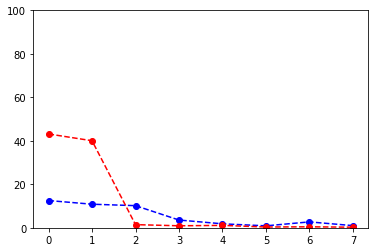

In [47]:
plt.plot(history.history['loss'],'--o', color='blue')
plt.plot(history.history['val_loss'],'--o', color='red')
plt.ylim(0,100)

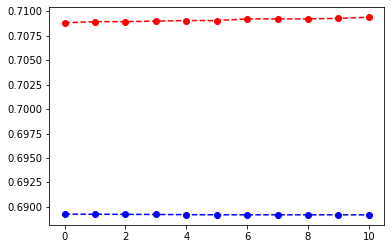

In [39]:
plt.plot(history2.history['loss'],'--o', color='blue')
plt.plot(history2.history['val_loss'],'--o', color='red')

In [40]:
pred2 = model2.predict(test_X)
pred_y_max2 = np.argmax(pred2, axis=1)
test_y_max2 = np.argmax(test_y, axis=1)

In [48]:
pred = model.predict(test_X)
pred_y_max = np.argmax(pred, axis=1)
test_y_max = np.argmax(test_y, axis=1)

In [49]:
acc = np.mean(np.equal(pred_y_max,test_y_max))
print("Acc : {}".format(round(100*acc,8)))

Acc : 75.0


In [43]:
acc2 = np.mean(np.equal(pred_y_max2,test_y_max2))
print("Acc : {}".format(round(100*acc,8)))

Acc : 54.16666667
